<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/data_collection_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting spu google drive
from google.colab import drive
drive.mount('/content/drive')

########################################

#changing the working directory
import os
os.chdir("/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior")

!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior


### EV - Market Analysis and Consumer Behavior

This notebook is for exploring  various datasets conducting preliminary exploratory data analysis (EDA) with the objective of understanding if they are suitable for analyzing the Electric Vehicle (EV) market and discerning consumer behavior trends.


> - Data Collection and Integration: Acquisition and integration of different datasets relevant to the EV market and consumer behavior. (datasets may include information on EV sales, charging infrastructure, government incentives, demographic data, consumer surveys, and possibly other related metrics)
> - Data Cleaning and Preparation: Cleaning and preprocessing the collected datasets to ensure data quality and consistency.
> - Preliminary EDA: Conducting the EDA to gain insights into the characteristics and patterns within the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

The first dataset that we are going to look at is the **Global Electric Vehicle Market Share** downloaded from [data.world](https://data.world/makeovermonday/2023w7/workspace/file?filename=Global+Electric+Vehicle+Market+Share.xlsx)


Data Source: [Counterpoint Research](https://www.counterpointresearch.com/insights/global-electric-vehicle-market-share/)

In [3]:
data = pd.read_excel('https://query.data.world/s/j3zfvtlaqca6nwnhs62wfecky7rduf?dws=00000')
data.head()

,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Wuling,0.07,0.06,0.05,0.06,0.05,0.05
3,Volkswagen,0.07,0.06,0.05,0.04,0.04,0.04
4,GAC Motor,0.02,0.02,0.02,0.02,0.03,0.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   6 non-null      object 
 1   Q2 2021  6 non-null      float64
 2   Q3 2021  6 non-null      float64
 3   Q4 2021  6 non-null      float64
 4   Q1 2022  6 non-null      float64
 5   Q2 2022  6 non-null      float64
 6   Q3 2022  6 non-null      float64
dtypes: float64(6), object(1)
memory usage: 464.0+ bytes


In [5]:
data.drop('Brands', axis=1)

,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,0.07,0.11,0.12,0.14,0.16,0.20
1,0.15,0.15,0.14,0.16,0.12,0.13
2,0.07,0.06,0.05,0.06,0.05,0.05
3,0.07,0.06,0.05,0.04,0.04,0.04
4,0.02,0.02,0.02,0.02,0.03,0.03
5,0.62,0.59,0.62,0.59,0.60,0.55


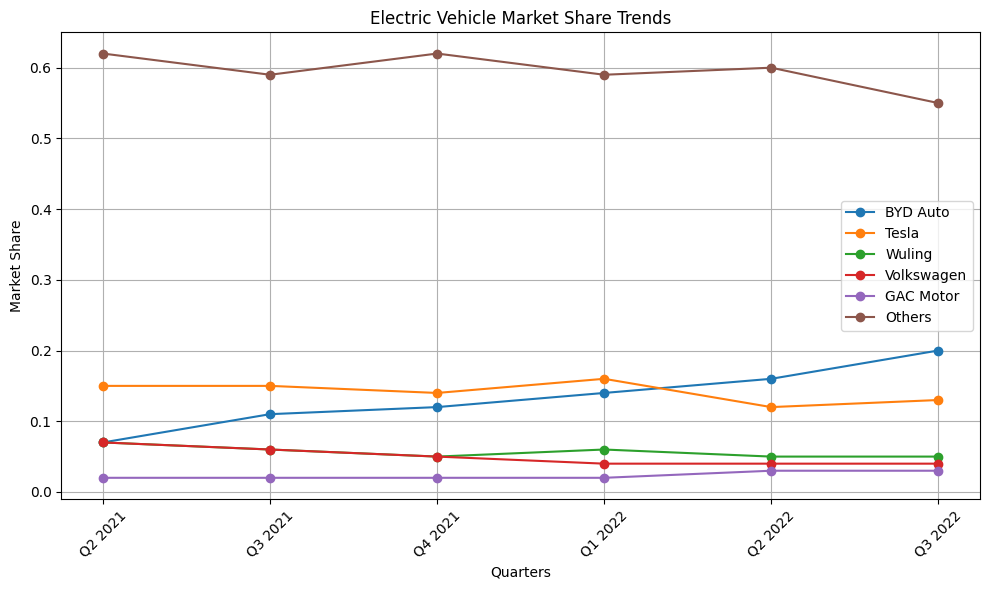

In [ ]:
# Plotting market share trends for all brands
plt.figure(figsize=(10, 6))

for index, row in data.iterrows():
    plt.plot(data.columns[1:], row[1:], marker='o', label=row['Brands'])

plt.title('Electric Vehicle Market Share Trends')
plt.xlabel('Quarters')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

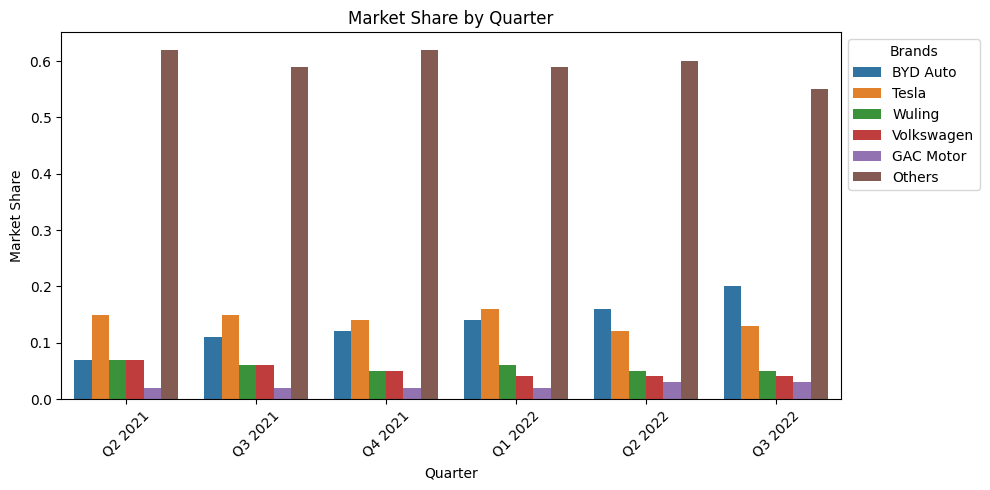

In [ ]:
# Melt the data to make it suitable for a bar plot
melted_data = data.melt(id_vars=['Brands'], var_name='Quarter', value_name='Market_Share')

# Plotting bar plot of market share by quarter
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=melted_data)
plt.title('Market Share by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

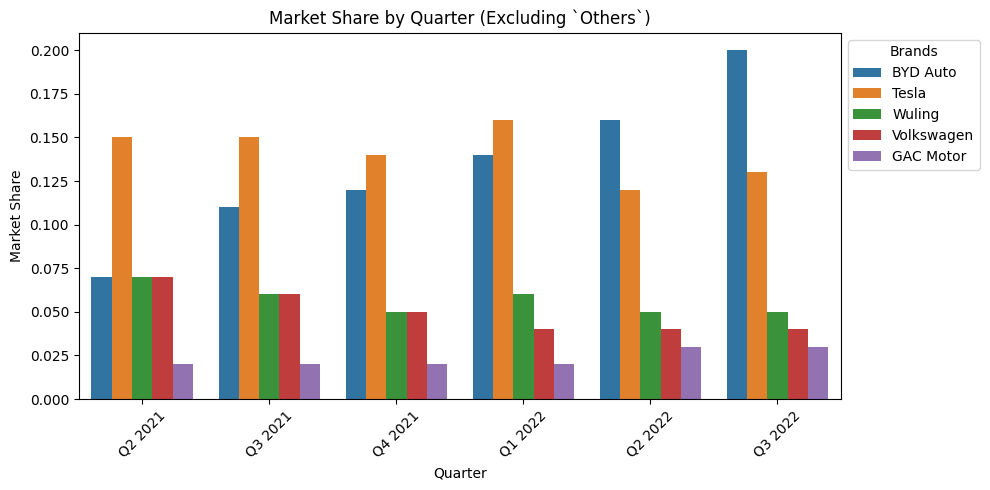

In [ ]:
# Filtering-out `Others`
filtered_data = data[data['Brands'] != "Others"]

# Melt the filtered data to make it suitable for a bar plot
melted_data = filtered_data.melt(id_vars=['Brands'], var_name='Quarter', value_name='Market_Share')

# Plotting bar plot of market share by quarter
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=melted_data)
plt.title('Market Share by Quarter (Excluding `Others`)')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The above dataset basically is tracking the market share of different electric vehicle brands over several quarters from **Q2 2021** to **Q3 2022**

- **BYD Auto:** BYD Auto is a Chinese automobile manufacturer specializing in electric vehicles (EVs), batteries, and renewable energy solutions.
- **Tesla:** Tesla is an American electric vehicle and clean energy company founded by Elon Musk.
- **Wuling:** Wuling is a Chinese automotive manufacturer, known for producing electric vehicles, particularly electric minivans and microvans.
- **Volkswagen:** Volkswagen (VW) is a German automaker known for its wide range of vehicles, including electric cars.
- **GAC Motor:** GAC Motor is a Chinese automobile manufacturer affiliated with Guangzhou Automobile Group.


From the above visualization, BYD at the end of **Q3 2022** emerging as the market leader, overtaking Tesla. The other takeway from the visualizations is that 3 out of the 5 top EV manufacturers are Chineses owned companies. And that the **BIG 3** Americal Automotive companies are nowhere to befound.

The dataset that we are going to look at is called **IEA Global EV Dataset** which is part of the Global EV Data Explorer, developed by the **International Energy Agency (IEA)**, provides a comprehensive view of historical and projected data related to electric vehicles (EVs).

**Data Coverage:**
- Explore information on EV sales, stock, charging infrastructure, and oil displacement.
- The data is regularly updated, with the most recent update on April 26, 2023 <br> <br>

**Data Variables Description:**
- **Region:** This column denotes the geographic region to which the data pertains. In the provided sample, the region is "Australia".
- **Category:** This column categorizes the type of data. In the sample, it includes historical data related to electric vehicle (EV) stock and EV sales.
- **Parameter:** This column specifies the specific parameter being measured or described in the dataset. Examples include "EV stock" and "EV sales share".
- **Mode:** This column indicates different modes of operation or aspects related to electric vehicles. In the sample, it includes "Cars".
- **Powertrain:** This column describes the type of powertrain used in the electric vehicles. In the sample, it includes "BEV" (Battery Electric Vehicle).
- **Year:** This column denotes the year to which the data corresponds. In the sample, it ranges from 2011 to 2012.
- **Unit:** This column specifies the unit of measurement for the corresponding 'value' variable. In the sample, it includes "Vehicles" and "percent".
- **Value:** This column contains the actual numerical values of the data being measured or described in the dataset. It represents the number of vehicles or percentages, depending on the unit specified.

In [ ]:
data = pd.read_csv("marketshare and industry data/IEA Global EV Data 2023.csv")
data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB


In [ ]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(data.columns):
  datatype = data[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

region  --> object
category  --> object
parameter  --> object
mode  --> object
powertrain  --> object
year  --> int64
unit  --> object
value  --> float64


In [ ]:
# Explore unique values of categorical variables
print("Unique regions:", data['region'].unique())
print("Unique categories:", data['category'].unique())
print("Unique parameters:", data['parameter'].unique())
print("Unique modes:", data['mode'].unique())
print("Unique powertrains:", data['powertrain'].unique())
print("Unique years:", data['year'].unique())
print("Unique units:", data['unit'].unique())


Unique regions: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other Europe' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkiye' 'United Kingdom' 'USA' 'World']
Unique categories: ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique parameters: ['EV stock' 'EV sales share' 'EV stock share' 'EV sales'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique modes: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique powertrains: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']
Unique years: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2010 2025
 2030]
Unique units: ['Vehicles' 'percent' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement

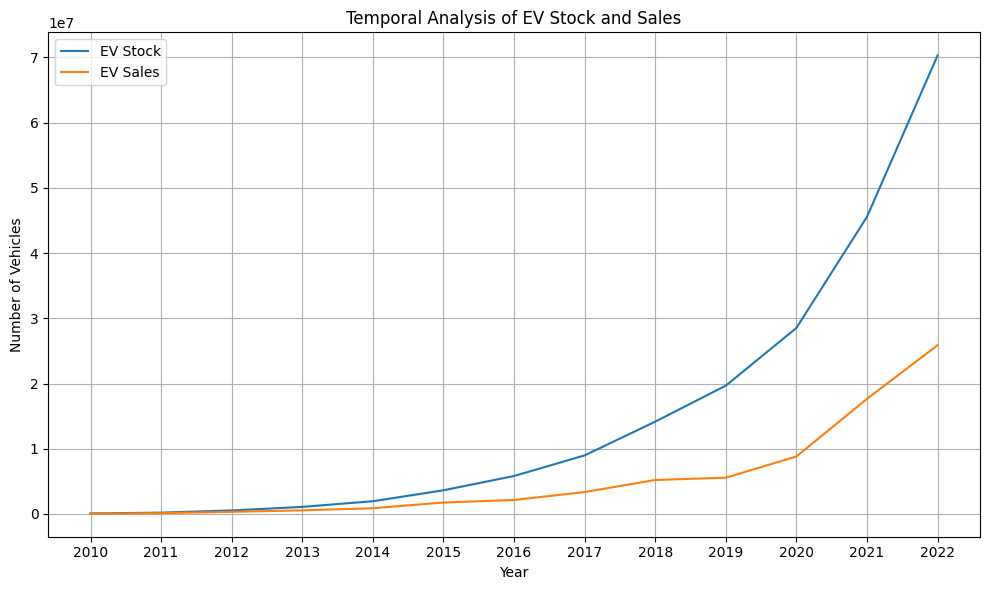

In [ ]:
# Filtering data for EV stock and sales
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock.groupby('year')['value'].sum()
ev_sales_yearly = ev_sales.groupby('year')['value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()


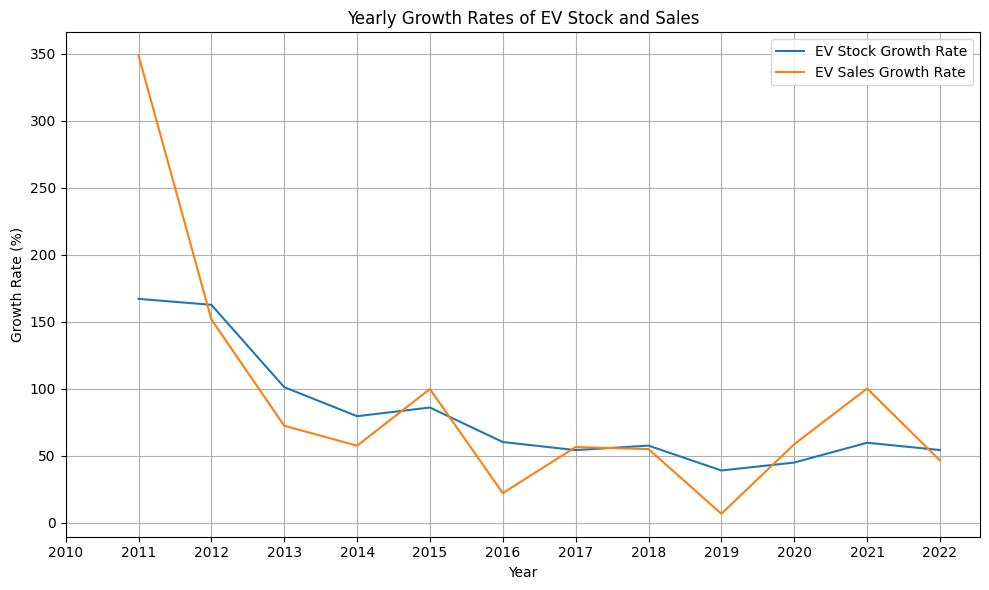

In [ ]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

In [ ]:
# Electricity Demand and EV Adoption

# Filtering data for Electricity Demand and EV Sales
electricity_demand = data[(data['parameter'] == 'Electricity demand') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]


fig = make_subplots(rows=1, cols=2, subplot_titles=('Electricity Demand', 'EV Sales'))

# Adding bar graphs to subplots
fig.add_trace(go.Bar(x=electricity_demand['year'], y=electricity_demand['value'], name='Electricity Demand'), row=1, col=1)
fig.add_trace(go.Bar(x=ev_sales['year'], y=ev_sales['value'], name='EV Sales'), row=1, col=2)


fig.update_layout(title='Electricity Demand and EV Adoption Over Time',
                  xaxis=dict(title='Year'),
                  yaxis=dict(title='Value'),
                  barmode='group')


fig.show()

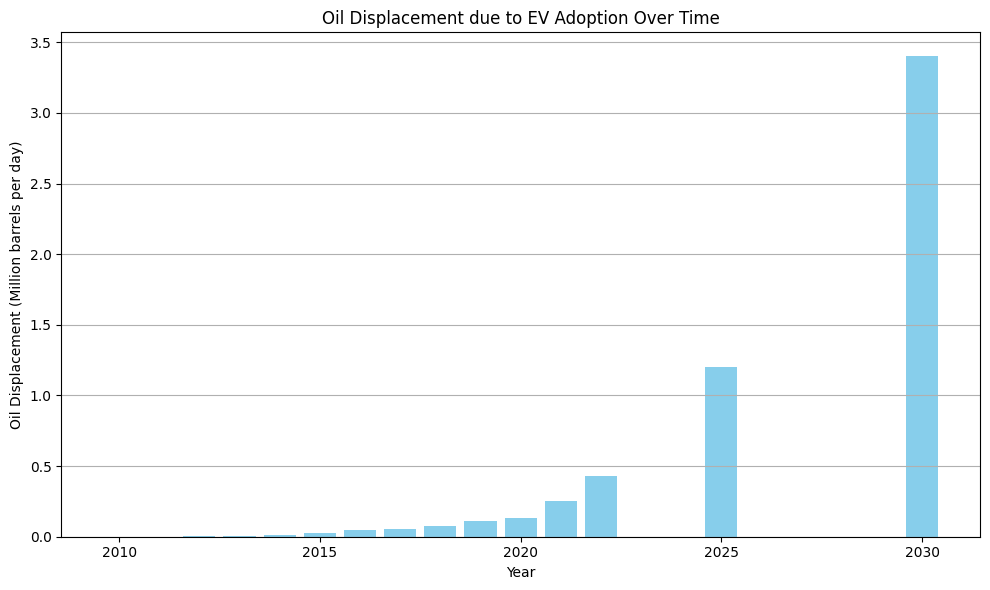

In [ ]:
# Oil Displacement Over Time
oil_displacement = data[data['parameter'] == 'Oil displacement Mbd']

plt.figure(figsize=(10, 6))
plt.bar(oil_displacement['year'], oil_displacement['value'], color='skyblue')
plt.title('Oil Displacement due to EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Oil Displacement (Million barrels per day)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Comparing EV Adoption Across Regions

# Filtering data for EV stock
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]

# Aggregating EV stock by year and region
ev_stock_agg = ev_stock.groupby(['year', 'region'])['value'].sum().reset_index()


fig = px.bar(ev_stock_agg, x='year', y='value', color='region',
             labels={'value': 'EV Stock', 'year': 'Year'},
             title='EV Adoption Across Regions Over Time',
             barmode='stack')
fig.update_layout(xaxis=dict(type='category'))
fig.show()


In [ ]:
# Filter the data for EV sales
ev_sales_data = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

def create_choropleth():
    # filtered_data = ev_sales_data.copy()

    fig = px.choropleth(ev_sales_data,
                        locations='region',
                        locationmode='country names',
                        color='value',
                        color_continuous_scale='Viridis',
                        hover_name='region',
                        projection='natural earth',
                        title='EV Sales',
                        animation_frame='year',
                        labels={'value': 'EV Sales', 'year': 'Year'},
                        )
    fig.update_layout(updatemenus=[
        dict(
            buttons=[
                dict(label='BEV',
                     method='update',
                )
                for year in ev_sales_data['powertrain'].unique()
            ],
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
        dict(
            buttons=[
                dict(label= 'Year',
                     method='animate',
                     args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}])
                for year in ev_sales_data['year'].unique()
            ],

        )
    ])

    fig.show()


create_choropleth()

In [ ]:

#Comparison of EV Sales Share Across Regions

# Filtering the data to include only rows where parameter is 'EV sales share'
ev_sales_share_data = data[data['parameter'] == 'EV sales share']

# Grouping the data by region and year, then calculating the mean sales share for each region
mean_sales_share_by_region = ev_sales_share_data.groupby(['region', 'year'])['value'].mean().reset_index()


fig = px.bar(mean_sales_share_by_region, x='year', y='value', color='region',
             title='Comparison of EV Sales Share Across Regions',
             labels={'year': 'Year', 'value': 'EV Sales Share (%)', 'region': 'Region'},
             barmode='group')

fig.show()

In [ ]:
# Distribution of Powertrain Types Over Years

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]
pivot_data = filtered_data.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum', fill_value=0)
powertrains = pivot_data.columns.tolist()

# Creatinng a bar trace for each powertrain type
traces = []
for powertrain in powertrains:
    trace = go.Bar(
        x=pivot_data.index,
        y=pivot_data[powertrain],
        name=powertrain
    )
    traces.append(trace)

# Plotting the grouped bar chart using Plotly
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
# Distribution of Powertrain Types Over Years filtered by Region

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]

# Pivot the data to get counts of each powertrain type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'powertrain'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of powertrain types
powertrains = pivot_data.columns.get_level_values('powertrain').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each powertrain type and region
traces = []
for powertrain in powertrains:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        trace = go.Bar(
            x=pivot_data.index,
            y=pivot_data[region, powertrain],
            name=region + ' - ' + powertrain,
            visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
        )
        traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
# Filter data for EV adoption by different vehicle modes
ev_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Create a stacked bar graph
fig = go.Figure()

for mode in grouped_data['mode'].unique():
    mode_data = grouped_data[grouped_data['mode'] == mode]
    fig.add_trace(go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    ))

fig.update_layout(
    barmode='stack',
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis_title='Year',
    yaxis_title='Number of Electric Vehicles',
    legend_title='Vehicle Mode'
)

fig.show()

In [ ]:
# Filter data for EV stock
ev_stock_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_stock_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Get unique modes and years
modes = grouped_data['mode'].unique()
years = grouped_data['year'].unique()

# Create a list to hold traces for each mode
traces = []

# Iterate over modes and create a trace for each mode
for mode in modes:
    mode_data = grouped_data[grouped_data['mode'] == mode]
    trace = go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Electric Vehicles'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
data['parameter'].unique()

array(['EV stock', 'EV sales share', 'EV stock share', 'EV sales',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [ ]:
# Filter data for EV stock
filtered_data = data[(data['parameter'] == 'EV sales') & (data['year'] >= 2010)]

# Pivot the data to get counts of each mode type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'mode'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of mode types
modes = pivot_data.columns.get_level_values('mode').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each mode type and region
traces = []
for mode in modes:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        if (region, mode) in pivot_data.columns:
            trace = go.Bar(
                x=pivot_data.index,
                y=pivot_data[region, mode],
                name = mode,
                visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
            )
            traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

Dataset1: The role of gender in consumer markets for electric vehicles - https://datadryad.org/stash/dataset/doi:10.25338/B80P8D

Data Description:

- Data sourced from households who purchased at least one new household vehicle since January 2008
- Questionnaire administered online
- Survey conducted in specific US states: California, Connecticut, Delaware,Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Oregon, Rhode Island, Vermont, and Washington
- Most states are "ZEV states" following California's Zero Emission Vehicle (ZEV) Mandate
- Non-ZEV states included for regional analysis or significance to the initial launch of retail ZEV sales in 2011
- Primary regional analysis focused on Northeast States for Coordinated Air Use Management (NESCAUM)
- NESCAUM member states: Connecticut, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, and Vermont
- Total sample size: 5,654 across all states

In [6]:
#lets read the datasets into pandas dataframes:
CA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863279")
DE_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863280")
MA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863281")
MD_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863284")
NJ_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863285")
NY_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863288")
OR_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863289")
WA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863293")



### **Data Cleaning**:

We need to clean out the dataset, removing a bunch of columns that are not going to be usefull for our analylsis and the unsupervised exploratory data analysis. Afterwards, we are also going to also currate the variable descriptions from the JMP files to the CSV here in the jupyter notebook.

In [7]:
#lets just take a look the CA_dataset

CA_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,40,HEV,NaN,NaN,NaN,HEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,0.0,0.0,0.0,5.490969,5.490969,0.0,0.0,0.0,0.0,NaN
1,36,HEV,NaN,NaN,NaN,HEV,College Graduate,College Graduate,Male,Male,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,32,PHEV,NaN,NaN,NaN,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,48,EV,NaN,NaN,NaN,EV,High School Graduate or GED,High school or less,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,50,EV,NaN,NaN,NaN,EV,Some Graduate School,Some Graduate School,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
#for this dataset, lets take a look at the number of columns/variables and rows/records we are working with
CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB


In [9]:
#lets take a look at the rows and columns of all the datasets:
# Print info for each dataset
print("CA_dataset info:")
print(CA_dataset.info())
print("\nDE_dataset info:")
print(DE_dataset.info())
print("\nMA_dataset info:")
print(MA_dataset.info())
print("\nMD_dataset info:")
print(MD_dataset.info())
print("\nNJ_dataset info:")
print(NJ_dataset.info())
print("\nNY_dataset info:")
print(NY_dataset.info())
print("\nOR_dataset info:")
print(OR_dataset.info())
print("\nWA_dataset info:")
print(WA_dataset.info())

CA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB
None

DE_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 190 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(149), int64(2), object(39)
memory usage: 297.0+ KB
None

MA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 192 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(153), int64(1), object(38)
memory usage: 747.1+ KB
None

MD_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Columns: 194 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(155), int64(2), object(37)
memory usage: 600.3+ KB
None

NJ_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 

From the above, we can see that we have varying number of variable in the datasets. So before we start cleaningout the datasets and mearging them, it would be best to know the unique variables that are not available in other dataset and the common columns/variables in all the datasets.

In [10]:
# We are going to create 2 list of column names, common colums among all the datasets and non-common columns

# Extract column names
column_names = {
    "CA": set(CA_dataset.columns),
    "DE": set(DE_dataset.columns),
    "MA": set(MA_dataset.columns),
    "MD": set(MD_dataset.columns),
    "NJ": set(NJ_dataset.columns),
    "NY": set(NY_dataset.columns),
    "OR": set(OR_dataset.columns),
    "WA": set(WA_dataset.columns)
}

# Common column names
common_columns = set.intersection(*column_names.values())

# Columns not common in all datasets
not_common_columns = set.union(*column_names.values()) - common_columns

In [11]:
#for each not common column name, we are going to print out the datasets it's in:

for column in not_common_columns:
    print(f"\nColumn: {column}")
    for dataset, columns in column_names.items():
        if column in columns:
            print(f"- Dataset: {dataset}")


Column: Enviro Factor1b
- Dataset: CA

Column: rConsiderEV
- Dataset: CA
- Dataset: NJ
- Dataset: NY

Column: Prior PEV Factor1: range time imp
- Dataset: MA

Column: Consider an FCV 2
- Dataset: MD

Column: rIncome
- Dataset: CA

Column: Prior FCV Factor3
- Dataset: CA

Column: Driving Exp Factor1: HEV PHEV imp
- Dataset: NJ

Column: PEV Prior Factor4: price imp
- Dataset: MA

Column: Driving exp: EV (trunc)
- Dataset: CA
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NJ
- Dataset: NY
- Dataset: OR

Column: rrConsiderFCV
- Dataset: NY

Column: Prior PEV Factor2: time range price imp
- Dataset: OR

Column: Driving Experience Factor1
- Dataset: CA

Column: Driving exp: BEV (trunc)
- Dataset: WA

Column: Prior PEV Factor3: public imp
- Dataset: OR

Column: Prior FCV Factor1
- Dataset: CA

Column: Prior FCV Factor1: range time imp
- Dataset: DE

Column: Envi Factor2: risk imp
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NY
- Dataset: OR

Column: Familiarity Factor3: ICEV im

We are not going to give much attention to the uncommon variable

We are going to remove the truncated columns and some columns that we dont have any use of

In [12]:
# Filter out column names containing "(trunc)"
common_columns_filtered = [col for col in common_columns if "(trunc)" not in col]


# List of variables to remove
variables_to_remove = [
    'Base body size 2',
    'No Trucks, Plus Incentives: drivetrain design 1',
    'No Trucks, Plus Incentives: drivetrain design 2',
    'No Trucks, Plus Incentives: drivetrain design 3',
    'No Trucks, Plus Incentives: drivetrain design 4',
    'FCV: fueling time',
    'Consider an FCV',
    'Driving exp: FCV',
    'Familiarity: FCVs',
    'FCV: public refueling',
    'FCV: purchase price',
    'FCV: range',
    'FCV: reliability',
    'FCV: safety',
    'w Non-ZEV: battery concerns',
    'w Non-ZEV: charge/fuel time',
    'w Non-ZEV: electricity supply',
    'w Non-ZEV: environmental concerns',
    'w Non-ZEV: fuel cost',
    'w Non-ZEV: fuel safety',
    'w Non-ZEV: higher incentives',
    'w Non-ZEV: impression',
    'w Non-ZEV: lifestyle',
    'w Non-ZEV: limited fuel network',
    'w Non-ZEV: looks',
    'w Non-ZEV: maintenance cost',
    'w Non-ZEV: no home charge or fuel',
    'w Non-ZEV: purchase cost',
    'w Non-ZEV: range',
    'w Non-ZEV: reliability',
    'w Non-ZEV: unfamiliar technology',
    'w Non-ZEV: vehicle safety',
    'w Pro-ZEV: air quality',
    'w Pro-ZEV: climate change',
    'w Pro-ZEV: comfortable',
    'w Pro-ZEV: fuel cost',
    'w Pro-ZEV: fun',
    'w Pro-ZEV: home charge convenience',
    'w Pro-ZEV: impression',
    'w Pro-ZEV: incentives',
    'w Pro-ZEV: lifestyle',
    'w Pro-ZEV: looks',
    'w Pro-ZEV: maintenance cost',
    'w Pro-ZEV: money to oil producers',
    'w Pro-ZEV: oil imports',
    'w Pro-ZEV: purchase cost',
    'w Pro-ZEV: safer',
    'w Pro-ZEV: tech',

]

# Filter out variables to remove from common_columns_filtered
common_columns_filtered = [col for col in common_columns_filtered if col not in variables_to_remove]

# Sort common_columns_filtered alphabetically
common_columns_filtered.sort()

# Move 'Response ID..' to the beginning of the list
common_columns_filtered.insert(0, common_columns_filtered.pop(common_columns_filtered.index('Response ID..')))


In [13]:
# Lets first filter the datasets to only havr the common variables
CA_dataset = CA_dataset[list(common_columns_filtered)]
DE_dataset = DE_dataset[list(common_columns_filtered)]
MA_dataset = MA_dataset[list(common_columns_filtered)]
MD_dataset = MD_dataset[list(common_columns_filtered)]
NJ_dataset = NJ_dataset[list(common_columns_filtered)]
NY_dataset = NY_dataset[list(common_columns_filtered)]
OR_dataset = OR_dataset[list(common_columns_filtered)]
WA_dataset = WA_dataset[list(common_columns_filtered)]


CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 94 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID..                                       1671 non-null   int64  
 1   Air pollution: lifesyle                             1671 non-null   float64
 2   Air pollution: personal worry                       1671 non-null   float64
 3   Air pollution: regional threat                      1671 non-null   float64
 4   Base body size                                      1671 non-null   object 
 5   Climate change: lifestyle                           1523 non-null   float64
 6   Commute                                             1671 non-null   object 
 7   Consider an EV                                      1671 non-null   object 
 8   Daily flexibility                                   1671 non-null   object 
 9

We will merge the datasets! and start doing some preliminary EDA

In [14]:
# Adding a 'state' column to each dataset
CA_dataset['state'] = 'CA'
DE_dataset['state'] = 'DE'
MA_dataset['state'] = 'MA'
MD_dataset['state'] = 'MD'
NJ_dataset['state'] = 'NJ'
NY_dataset['state'] = 'NY'
OR_dataset['state'] = 'OR'
WA_dataset['state'] = 'WA'

# List of datasets to concatenate
datasets = [CA_dataset, DE_dataset, MA_dataset, MD_dataset, NJ_dataset, NY_dataset, OR_dataset, WA_dataset]

# Concatenating the datasets vertically
merged_dataset = pd.concat(datasets, axis=0)

# Resetting index after concatenation
merged_dataset.reset_index(drop=True, inplace=True)
# Checking the first few rows of the merged dataset
merged_dataset.head()

,Response ID..,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size,Climate change: lifestyle,Commute,Consider an EV,Daily flexibility,Distance,...,Respondent's car fuel spending per month,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Seen Public EVSEs,Seen Public EVSEs yes/no,Should government offer incentives,Urgent national need,Veh 1 Total Price,"Veh 1 Total Price, don't know",state
0,40,2.300,2.31,2.490,Compact,2.640,No,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,200.0,...,85.0,800.0,800.0,Yes. I've seen them at a few places.,Yes,I'm not sure,0.000,71000.0,0.0,CA
1,36,2.940,2.87,1.410,Compact,2.940,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",35.0,...,20.0,140.0,140.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",2.810,NaN,1.0,CA
2,32,2.130,1.69,1.830,Compact,2.240,Yes,"Shopped for an electric vehicle, including a v...","I'm the only driver, so this question doesn't ...",200.0,...,40.0,200.0,200.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",1.750,51000.0,0.0,CA
3,48,2.870,2.90,2.940,Large,2.870,No,I (we) already have a vehicle powered by elect...,I have my car; they have their car. In general...,2500.0,...,200.0,2500.0,2500.0,Yes. I've seen them at several places.,Yes,"Yes, but only electricity",2.910,50000.0,0.0,CA
4,50,4.125,2.96,4.125,Compact,4.125,Yes,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",600.0,...,150.0,600.0,600.0,No. I haven't seen any.,No,I'm not sure,4.125,26500.0,0.0,CA


In [15]:
# Checking the shape of the merged dataset
merged_dataset.shape

(5248, 95)

In [16]:
merged_dataset.rename(columns={
  "Response ID..": "Response ID",
  "Income 2": "Income",
  "Veh 1 Total Price": "First Vehicle Total Price",
  "Veh 1 Total Price, don't know": "Do you know  First Vehicle Total Price"
}, inplace=True)


merged_dataset["Response ID"] = merged_dataset["Response ID"].astype("object")

In [17]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5247 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [18]:
# # We are going to replace `4.125`or `5.7` in all the numerical variable with `nan`
# # since from the variable descriptions 4.125 = don't know or 5.7 = no answer
# numerical_columns = merged_dataset.select_dtypes(include=['float64']).columns

# # Values to replace with NaN
# values_to_replace = [4.125, 5.7]

# # Replace the specified values with NaN in numerical columns
# for column in numerical_columns:
#     merged_dataset[column] = merged_dataset[column].replace(values_to_replace, float('nan'))

In [19]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 6.0
Driving exp: HEV --- -3.0 - 6.0
Driving exp: PHEV --- -3.0 - 6.0
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 4.26
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 8.0
Non-ZEV:

The below columns/variable values are in a scale that ranges from -3 to 3

- Air pollution: lifesyle --- -3 -> 3
- Air pollution: personal worry --- -3 -> 3
- Air pollution: regional threat --- -3 -> 3
- Climate change: lifestyle --- -3 -> 3
- Driving exp: EV --- --3 -> 3
- Driving exp: HEV --- -3 -> 3
- Driving exp: PHEV --- -3 -> 3
- EV: charge time --- -3 -> 3
- EV: home charge --- -3 -> 3
- EV: public charging --- -3 -> 3
- EV: purchase price --- -3 -> 3
- EV: range --- -3 -> 3
- EV: reliability --- -3 -> 3
- EV: safety --- -3 -> 3
- Environmental risk --- -3 -> 3
- Familiarity: EVs --- -3 -> 3
- Familiarity: Gasoline Vehicles --- -3 -> 3
- Familiarity: HEVs --- -3 -> 3
- Familiarity: PHEVs --- -3 -> 3
- Global warming: certainty --- -3 -> 3
- Health risk --- -3 -> 3
- Market provides incentives --- -3 -> 3

The below columns/variable values are in a scale that ranges from 0 to 5

- Non-ZEV: battery concerns --- 0 -> 5
- Non-ZEV: charge/fuel time --- 0 -> 5
- Non-ZEV: electricity supply --- 0 -> 5
- Non-ZEV: enviormental concerns --- 0 -> 5
- Non-ZEV: fuel cost --- 0 -> 5
- Non-ZEV: fuel safety --- 0 -> 5
- Non-ZEV: impression --- 0 -> 5
- Non-ZEV: lifestyle --- 0 -> 5
- Non-ZEV: limited fuel network --- 0 -> 5
- Non-ZEV: looks --- 0 -> 5
- Non-ZEV: maintenance cost --- 0 -> 5
- Non-ZEV: no home charge or fuel --- 0 -> 5
- Non-ZEV: purchase cost --- 0 -> 5
- Non-ZEV: range --- 0 -> 5
- Non-ZEV: unfamiliar technology --- 0 -> 5
- Non-ZEV: vehicle safety --- 0 -> 5
- Non-ZEVs: higher incentives --- 0 -> 5
- Non-ZEVs: reliability --- 0 -> 5
- Pro-ZEV: air quality --- 0 -> 5
- Pro-ZEV: climate change --- 0 -> 5
- Pro-ZEV: comfortable --- 0 -> 5
- Pro-ZEV: fuel cost --- 0 -> 5
- Pro-ZEV: fun --- 0 -> 5
- Pro-ZEV: home charge convenience --- 0 -> 5
- Pro-ZEV: impression --- 0 -> 5
- Pro-ZEV: incentives --- 0 -> 5
- Pro-ZEV: lifestyle --- 0 -> 5
- Pro-ZEV: looks --- 0 -> 5
- Pro-ZEV: maintenance cost --- 0 -> 5
- Pro-ZEV: money to oil producers --- 0 -> 5
- Pro-ZEV: oil imports --- 0 -> 5
- Pro-ZEV: purchase cost --- 0 -> 5
- Pro-ZEV: safer --- 0 -> 5
- Pro-ZEV: tech --- 0 -> 5

In [20]:
# Based on the above we want to do some cleaning as there are some columns that have value that are not in the
    # specified ranges (ie. -3 to 3 and 0 to -5), not to 4.125 or 5.7 or NaN (4.125 = don't know, 5.7 = no answer)

columns_to_check = [
    "Air pollution: lifesyle","Air pollution: personal worry","Air pollution: regional threat","Climate change: lifestyle",
    "Driving exp: EV","Driving exp: HEV","Driving exp: PHEV","EV: charge time","EV: home charge","EV: public charging",
    "EV: purchase price","EV: range","EV: reliability","EV: safety","Environmental risk","Familiarity: EVs","Familiarity: Gasoline Vehicles",
    "Familiarity: HEVs","Familiarity: PHEVs","Global warming: certainty","Health risk","Market provides incentives"
]

# The range for valid values
valid_range = (-3, 3)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_to_check:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < -3.0 or x > 3.0) and x not in [4.125, 5.7] else x)




In [21]:
# We will do the same for the 0 to 5 scale variable as well

columns_to_check = [
    'Non-ZEV: battery concerns', 'Non-ZEV: charge/fuel time', 'Non-ZEV: electricity supply','Non-ZEV: enviormental concerns', 'Non-ZEV: fuel cost', 'Non-ZEV: fuel safety',
    'Non-ZEV: impression', 'Non-ZEV: lifestyle', 'Non-ZEV: limited fuel network','Non-ZEV: looks', 'Non-ZEV: maintenance cost', 'Non-ZEV: no home charge or fuel',
    'Non-ZEV: purchase cost', 'Non-ZEV: range', 'Non-ZEV: unfamiliar technology','Non-ZEV: vehicle safety', 'Non-ZEVs: higher incentives', 'Non-ZEVs: reliability',
    'Pro-ZEV: air quality', 'Pro-ZEV: climate change', 'Pro-ZEV: comfortable','Pro-ZEV: fuel cost', 'Pro-ZEV: fun', 'Pro-ZEV: home charge convenience',
    'Pro-ZEV: impression', 'Pro-ZEV: incentives', 'Pro-ZEV: lifestyle','Pro-ZEV: looks', 'Pro-ZEV: maintenance cost', 'Pro-ZEV: money to oil producers',
    'Pro-ZEV: oil imports', 'Pro-ZEV: purchase cost', 'Pro-ZEV: safer', 'Pro-ZEV: tech'
]


# The range for valid values
valid_range = (0, 5)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_to_check:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < 0 or x > 5.0) and x not in [4.125, 5.7] else x)

In [22]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 2.99
Driving exp: HEV --- -3.0 - 2.99
Driving exp: PHEV --- -3.0 - 2.99
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 2.99
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 5.0
Non-Z

In [23]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5247 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [28]:
numerical_variables = merged_dataset.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_variables = merged_dataset.select_dtypes(include=['object']).drop(columns=['Response ID']).columns.tolist()

#### Handling missing values:

**K-Nearest Neighbors (KNN) Imputation:**
- KNN imputation involves finding the K-nearest data points based on similarity and using their values to impute missing values.
- This method can handle both numerical and categorical data effectively.

In [24]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
# Creating a copy the dataset for manipulation
merged_dataset_copy = merged_dataset.copy()

numerical_cols = merged_dataset.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = merged_dataset.select_dtypes(include=['object']).drop(columns=['Response ID']).columns.tolist()


# One-hot encoding for categorical variables
encoded_categorical_cols = pd.get_dummies(merged_dataset_copy[categorical_cols])

# Scaling numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(merged_dataset_copy[numerical_cols])
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols)

# Combining encoded categorical and scaled numerical features
merged_dataset_scaled_encoded = pd.concat([encoded_categorical_cols, scaled_numerical_features_df], axis=1)

# KNN imputation
imputer = KNNImputer()
merged_dataset_imputed = imputer.fit_transform(merged_dataset_scaled_encoded)
merged_dataset_imputed_df = pd.DataFrame(merged_dataset_imputed, columns=merged_dataset_scaled_encoded.columns)

# Reversing encoding for categorical variables
merged_dataset_imputed_df_decoded = pd.concat([merged_dataset_imputed_df[numerical_cols],
                                              merged_dataset_copy[categorical_cols]], axis=1)

# Reversing scaling for numerical features
merged_dataset_imputed_df_decoded[numerical_cols] = scaler.inverse_transform(merged_dataset_imputed_df_decoded[numerical_cols])

# Replacing original columns in merged_dataset
merged_dataset[numerical_cols] = merged_dataset_imputed_df_decoded[numerical_cols]
merged_dataset[categorical_cols] = merged_dataset_imputed_df_decoded[categorical_cols]

In [31]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5247 non-null   object 
 5   Climate change: lifestyle                           5248 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [32]:
merged_dataset.head()

,Response ID,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size,Climate change: lifestyle,Commute,Consider an EV,Daily flexibility,Distance,...,Respondent's car fuel spending per month,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Seen Public EVSEs,Seen Public EVSEs yes/no,Should government offer incentives,Urgent national need,First Vehicle Total Price,Do you know First Vehicle Total Price,state
0,40,2.300,2.31,2.490,Compact,2.640,No,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,200.0,...,85.0,800.0,800.0,Yes. I've seen them at a few places.,Yes,I'm not sure,0.000,71000.0,0.0,CA
1,36,2.940,2.87,1.410,Compact,2.940,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",35.0,...,20.0,140.0,140.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",2.810,23700.0,1.0,CA
2,32,2.130,1.69,1.830,Compact,2.240,Yes,"Shopped for an electric vehicle, including a v...","I'm the only driver, so this question doesn't ...",200.0,...,40.0,200.0,200.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",1.750,51000.0,0.0,CA
3,48,2.870,2.90,2.940,Large,2.870,No,I (we) already have a vehicle powered by elect...,I have my car; they have their car. In general...,2500.0,...,200.0,2500.0,2500.0,Yes. I've seen them at several places.,Yes,"Yes, but only electricity",2.910,50000.0,0.0,CA
4,50,4.125,2.96,4.125,Compact,4.125,Yes,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",600.0,...,150.0,600.0,600.0,No. I haven't seen any.,No,I'm not sure,4.125,26500.0,0.0,CA


Data 2: Understanding the impact of public charging infrastructure on the consideration to purchase an electric vehicle in California -> https://datadryad.org/stash/dataset/doi:10.25338/B8035D

In [ ]:

data2 = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/2211655")

data2.head()

,id,PHEVfamiliarity,BEVfamiliarity,BEVexperience,PHEVexperience,fuelaphev,fuelabev,nameabev,nameaphev,infosearch,...,BEVmassmarket,PHEVpluginathome,PHEVenoughcharging,iPHEVchargetoolong,iPHEVrangetooshort,iPHEVhigherprice,iPHEVgasolinesafer,iPHEVgasolinemorereliable,PHEVenvsdamage,PHEVmassmarket
0,1,-3.0,-1.4,-3.0,-3.0,0,1,1,0,0,...,0.0,-3.0,-3.0,0.0,-3.0,-3.0,-2.9,-3.0,0.0,-1.7
1,2,1.6,1.7,-3.0,-3.0,1,1,0,1,0,...,2.5,-1.5,1.2,0.6,1.2,-1.0,-0.1,0.1,1.7,2.7
2,3,2.0,2.5,-3.0,-3.0,1,1,1,0,0,...,0.5,-3.0,-3.0,-3.0,-3.0,-3.0,-0.5,-0.5,-2.0,1.5
3,4,0.0,0.0,-3.0,-3.0,1,1,0,0,0,...,0.0,-3.0,-3.0,-3.0,-3.0,0.0,0.0,-3.0,3.0,0.0
4,5,1.8,1.5,2.4,2.4,1,0,0,0,0,...,2.2,1.9,0.5,0.5,-2.6,0.6,-2.7,0.7,2.6,-0.4


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2991 non-null   int64  
 1   PHEVfamiliarity            2991 non-null   float64
 2   BEVfamiliarity             2991 non-null   float64
 3   BEVexperience              2991 non-null   float64
 4   PHEVexperience             2991 non-null   float64
 5   fuelaphev                  2991 non-null   int64  
 6   fuelabev                   2991 non-null   int64  
 7   nameabev                   2991 non-null   int64  
 8   nameaphev                  2991 non-null   int64  
 9   infosearch                 2991 non-null   int64  
 10  BEVpositiveconvo           2991 non-null   int64  
 11  PHEVpositiveconvo          2991 non-null   int64  
 12  numofincentives            2991 non-null   int64  
 13  advertaware                2991 non-null   int64

In [ ]:
data2["id"] = data2["id"].astype(str)

##### Demographic Information:
- id: Identifier for each respondent.
- age: Age of the respondent.
- maledummy: Binary variable indicating gender (1 for male, 0 for female).
- Familiarity and Experience:
- PHEVfamiliarity: Level of familiarity with PHEVs.
- BEVfamiliarity: Level of familiarity with BEVs.
- PHEVexperience: Level of experience with PHEVs.
- BEVexperience: Level of experience with BEVs.
##### Attitudes and Behavior:
- fuelaphev: Fuel type familiarity with PHEVs.
- fuelabev: Fuel type familiarity with BEVs.
- nameabev: Brand familiarity with BEVs.
- nameaphev: Brand familiarity with PHEVs.
- infosearch: Level of information search regarding EVs.
- BEVpositiveconvo: Positive conversations about BEVs.
- PHEVpositiveconvo: Positive conversations about PHEVs.
- numofincentives: Number of incentives considered for EV purchase.
- advertaware: Awareness of EV-related advertisements.
- HOVlaneuse: Usage of HOV lanes.
- income: Household income level.
- electricityaccess: Access to electricity.
##### Charging Infrastructure:
- Various columns related to the density of charging infrastructure per capita, at workplaces, and in different areas.
- Market Considerations:
- Columns related to considerations and perceptions regarding charging convenience, vehicle range, pricing, safety, environmental impact, and market feasibility for both BEVs and PHEVs.
##### Consideration of Purchasing:
ordBEVconsider: Ordinal variable indicating the consideration of purchasing a BEV.
- ordPHEVconsider: Ordinal variable indicating the consideration of purchasing a PHEV.
- seeEVSE: Whether the respondent sees electric vehicle supply equipment (EVSE).
